# Customer Churn Analysis

## Project Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can priorities focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Checking Null values in the dataframe

#like np.nan, None, nan, null like others

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Checking the data types of the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As per observation:

1. The dataset has 7043 rows and 21 columns.
2. No null values in any column of dataset.
3. 'customerID' column is unwanted column,which has no any corelation with target, now drop it.

In [5]:
df.drop(columns='customerID',inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(7021, 20)

After droping duplicate entries, our dataset has 7021 rows and 20 columns

# EDA (Exploratory Data Analysis) & Now Seperate Object and Numeric datatypes.

In [8]:
object_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        object_datatypes.append(i)
print(len(object_datatypes))
object_datatypes  

17


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [9]:
for i in df.columns:
    if df[i].dtypes == 'object':
        val=df[i].value_counts()
        nval=df[i].nunique()
        print(i ,':','\n',val, '\t:Total Categories:', nval, '\n')

gender : 
 Male      3541
Female    3480
Name: gender, dtype: int64 	:Total Categories: 2 

Partner : 
 No     3619
Yes    3402
Name: Partner, dtype: int64 	:Total Categories: 2 

Dependents : 
 No     4911
Yes    2110
Name: Dependents, dtype: int64 	:Total Categories: 2 

PhoneService : 
 Yes    6339
No      682
Name: PhoneService, dtype: int64 	:Total Categories: 2 

MultipleLines : 
 No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 	:Total Categories: 3 

InternetService : 
 Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64 	:Total Categories: 3 

OnlineSecurity : 
 No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64 	:Total Categories: 3 

OnlineBackup : 
 No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64 	:Total Categories: 3 

DeviceProtection 

1. The TotalCharges column contain numeric data but it shows data type as object means it has 'string' or 'white-space' value. White space means not a null value. 
2. Dataset has no any null values as we had observed earlier, but it's a space value. 
3. So we have to find out how many space values in the TotalCharges column with loc[] method, which gives us the index number.

In [10]:
df.loc[df.TotalCharges==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After some observation, we saw that some rows have space, so we have to replace with null value.

In [11]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [12]:
df.TotalCharges.isnull().sum()

11

In [13]:
# now converting TotalCharges type form object type to float type means typecasting, using astype()method
df.TotalCharges= df.TotalCharges.astype(float)

In [14]:
df.TotalCharges.dtype

dtype('float64')

# Handle the Null values

In [15]:
#Here the column is continous in nature, so we are using mean() method
df.TotalCharges.fillna(df.TotalCharges.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [16]:
numeric_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numeric_datatypes.append(i) 
print('Total:', len(numeric_datatypes))
numeric_datatypes

Total: 4


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
# Now updated object type column list
Object_Datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        Object_Datatypes.append(i)
print(len(Object_Datatypes))
Object_Datatypes  

16


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# Data Visualization

<Figure size 1080x576 with 0 Axes>

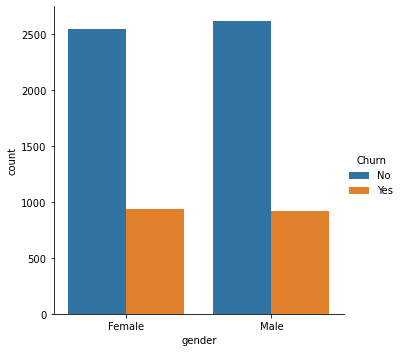

In [18]:
plt.figure(figsize=(15,8))
sns.factorplot(x='gender',data=df,kind='count',hue='Churn',height=5, aspect=1)
locs, labels = plt.xticks()
plt.show()

<Figure size 1080x576 with 0 Axes>

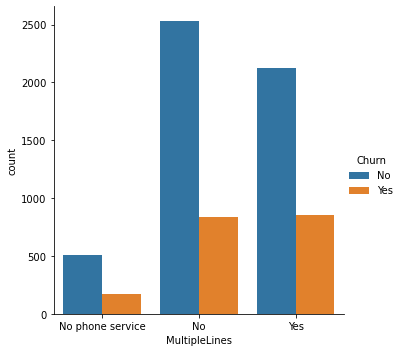

In [19]:
plt.figure(figsize=(15,8))
sns.factorplot(x='MultipleLines',data=df,kind='count',hue='Churn',height=5, aspect=1)
locs, labels = plt.xticks()
plt.show()

<Figure size 1080x576 with 0 Axes>

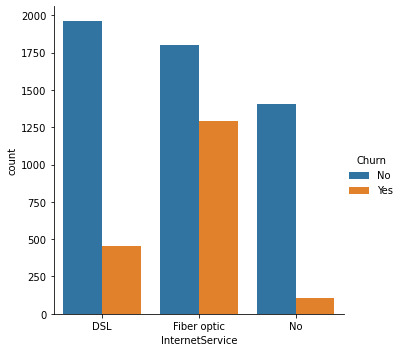

In [20]:
plt.figure(figsize=(15,8))
sns.factorplot(x='InternetService',data=df,kind='count',hue='Churn',height=5, aspect=1)
locs, labels = plt.xticks()
plt.show()

From above observation, Fiber optic InternetService has high level of churn.

<Figure size 1080x576 with 0 Axes>

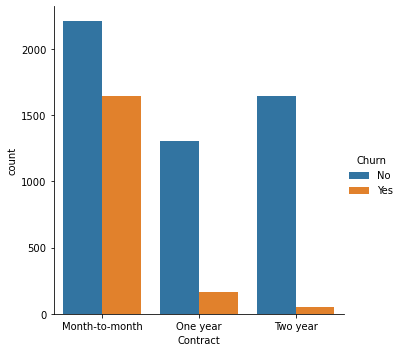

In [21]:
plt.figure(figsize=(15,8))
sns.factorplot(x='Contract',data=df,kind='count',hue='Churn',height=5, aspect=1)
locs, labels = plt.xticks()
plt.show()

As observed month-to-month contract customer has more number of churn.

<Figure size 1080x576 with 0 Axes>

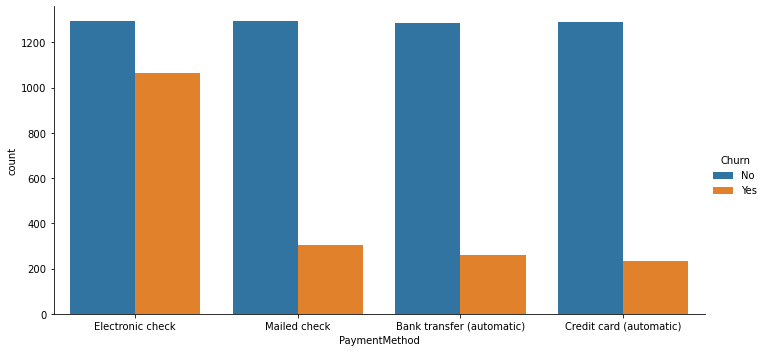

In [22]:
plt.figure(figsize=(15,8))
sns.factorplot(x='PaymentMethod',data=df,kind='count',hue='Churn',height=5, aspect=2)
locs, labels = plt.xticks()
plt.show()

As observed, Electronic check based customers have more number of churn.

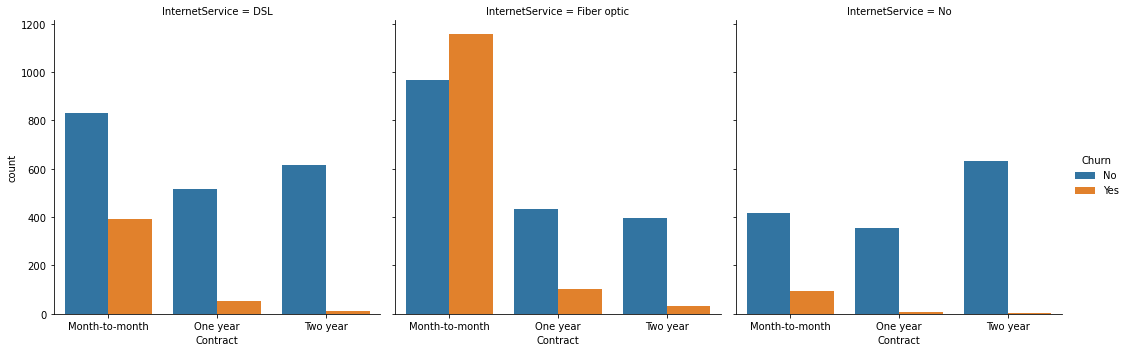

In [23]:
sns.factorplot(col='InternetService',hue='Churn',data=df,x='Contract',kind='count')

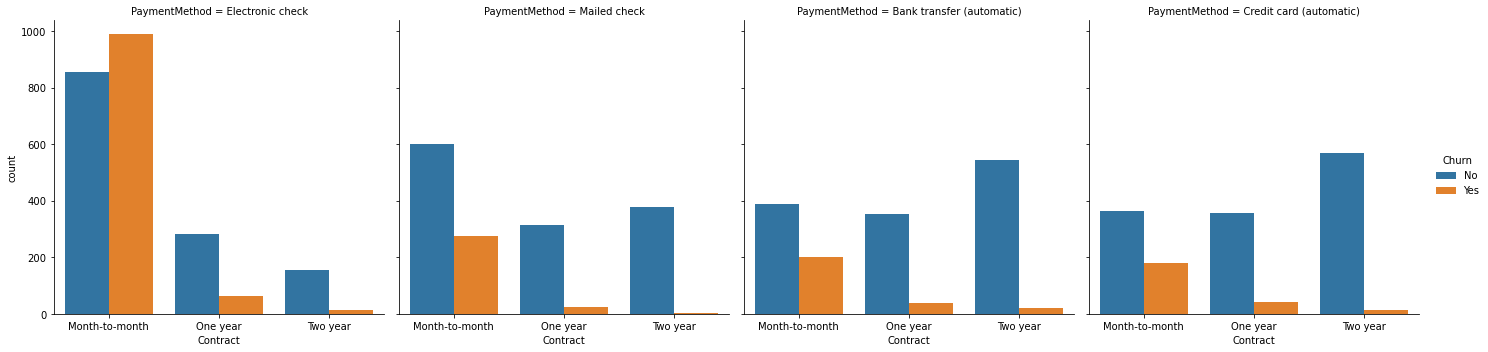

In [24]:
sns.factorplot(col='PaymentMethod',hue='Churn',data=df,x='Contract',kind='count')

As we observed earlier, the month-to-month contract based, Elctronic-check PaymentMethod based, and Fiber-Optic InternetService based cutomers have more number of churn.

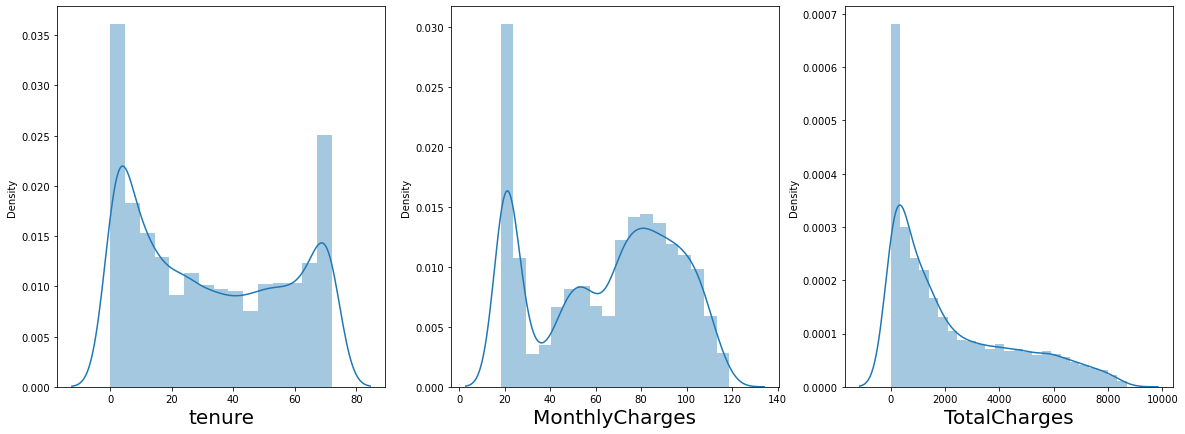

In [25]:
plt.figure (figsize=(20,7))
plotnumber = 1

numeric_featues=['tenure', 'MonthlyCharges', 'TotalCharges']
for column in numeric_featues:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

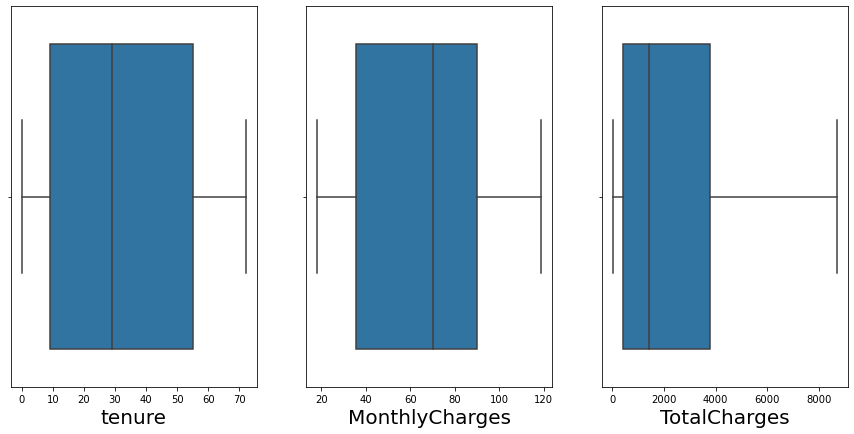

In [26]:
plt.figure (figsize=(15,7))
plotnumber = 1

numeric_featues=['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numeric_featues:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

From boxplot and scatterplot, as observed it shows no any outliers in dataset.

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2265.044136
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


# Since the dataset has a lot of string vales. We will use the encoding techniques to convert the sring data to numerical data.

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [29]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [30]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# Check correlation of the columns with the target column

In [31]:
df.corr()['Churn'].sort_values()

Contract           -0.396531
tenure             -0.351508
OnlineSecurity     -0.288505
TechSupport        -0.281654
TotalCharges       -0.198306
OnlineBackup       -0.194214
DeviceProtection   -0.176770
Dependents         -0.163459
Partner            -0.149135
InternetService    -0.047366
StreamingMovies    -0.036492
StreamingTV        -0.034591
gender             -0.008763
PhoneService        0.011323
MultipleLines       0.040175
PaymentMethod       0.106238
SeniorCitizen       0.151619
PaperlessBilling    0.190891
MonthlyCharges      0.194508
Churn               1.000000
Name: Churn, dtype: float64

In [32]:
# here 0 = no any correlation
# -0.3 to 0.3 = less correlation
# -0.5 to 0.5 = moderate correlation
# -0.7 to 0.7 = high correlation
# <-0.7 = very high -ve correlation
# >=0.7 = very high +ve correlation

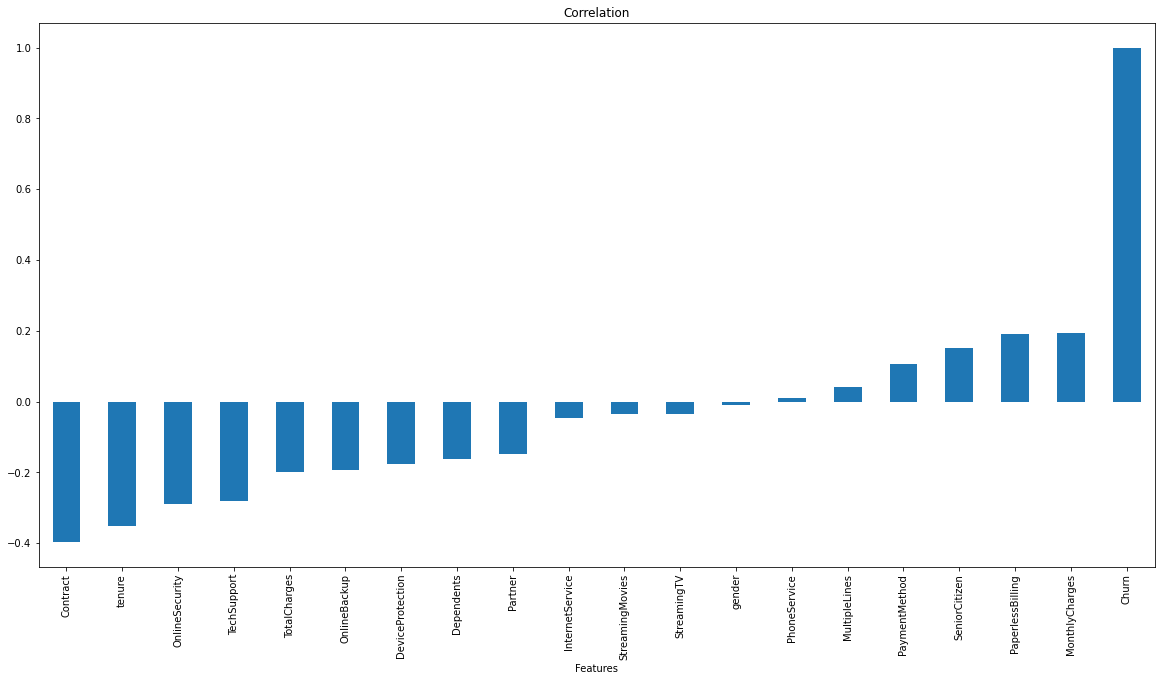

In [33]:
plt.figure(figsize=(20,10))
df.corr()['Churn'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.title('Correlation')
plt.show()

# Now Separting columns into features and target

In [81]:
x=df.drop(columns='Churn')
y=df.Churn
x.skew().sort_values()

PhoneService       -2.721300
PaperlessBilling   -0.377214
MonthlyCharges     -0.224097
PaymentMethod      -0.166267
gender             -0.017381
StreamingMovies     0.012488
StreamingTV         0.026366
Partner             0.061857
MultipleLines       0.112816
OnlineBackup        0.181338
DeviceProtection    0.185268
InternetService     0.208589
tenure              0.235542
TechSupport         0.401511
OnlineSecurity      0.416182
Contract            0.626004
Dependents          0.870322
TotalCharges        0.959073
SeniorCitizen       1.829987
dtype: float64

# Now use Transformation method to save our skewed data.

In [82]:
from sklearn.preprocessing import PowerTransformer

df_pt = PowerTransformer()
df_pw = pd.DataFrame(df_pt.fit_transform(x),columns=x.columns)
df_pw.skew().sort_values()

PhoneService       -2.721300
PaperlessBilling   -0.377214
MonthlyCharges     -0.259855
tenure             -0.243646
PaymentMethod      -0.206316
TotalCharges       -0.143826
StreamingMovies    -0.106539
StreamingTV        -0.098052
InternetService    -0.071493
gender             -0.017381
OnlineBackup       -0.001635
DeviceProtection    0.000849
MultipleLines       0.028603
Partner             0.061857
TechSupport         0.140414
OnlineSecurity      0.150084
Contract            0.297934
Dependents          0.870322
SeniorCitizen       1.829987
dtype: float64

In [86]:
x1=df_pw.copy
df1=df_pw.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod'])
df1.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

# Now remove remaining outliers using z-score technique.

In [87]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

Using powertransformation all skewness has removed, so as observed 0 result shows in z-score method to remove skewness.

In [88]:
y.value_counts()

0.0    5164
1.0    1857
Name: Churn, dtype: int64

It has been observed that our target class has an imbalance. So, we’ll try to resample the data

# SMOTE smapling

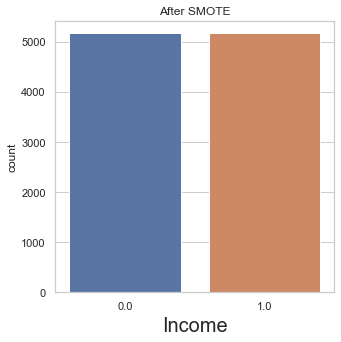

In [90]:
#Synthetic Minority Oversampling Technique (SMOTE)
#It is a statistical technique for increasing the number of cases in your dataset in a balanced way. 

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'not majority', random_state = 29)
x_res, y_res = sm.fit_resample(x, y)
y_res_df = pd.DataFrame(y_res)

plt.figure(figsize=(5,5))

sns.set(style = 'whitegrid')
sns.countplot(y_res_df.Churn).set_title('After SMOTE')
plt.xlabel('Income',fontsize=20)
plt.show()

In [91]:
y_res_df.shape

(10328, 1)

In [92]:
x_res.shape

(10328, 19)

# Data Scaling using Standard Scaler

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_res),columns=x_res.columns)
x_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.055249,-0.401375,1.177089,-0.614341,-1.116833,-3.192483,0.029264,-1.289020,-0.797760,1.391459,-0.954004,-0.810614,-1.100713,-1.104660,-0.673050,0.766665,0.374767,-1.339581,-0.927237
1,1.049528,-0.401375,-0.928320,-0.614341,0.262230,0.328318,-1.058672,-1.289020,1.656452,-0.941244,1.380358,-0.810614,-1.100713,-1.104660,0.638094,-1.406519,1.395848,-0.394013,-0.074539
2,1.049528,-0.401375,-0.928320,-0.614341,-1.075043,0.328318,-1.058672,-1.289020,1.656452,1.391459,-0.954004,-0.810614,-1.100713,-1.104660,-0.673050,0.766665,1.395848,-0.502178,-0.891335
3,1.049528,-0.401375,-0.928320,-0.614341,0.721918,-3.192483,0.029264,-1.289020,1.656452,-0.941244,1.380358,1.632813,-1.100713,-1.104660,0.638094,-1.406519,-1.667395,-0.905178,-0.096892
4,-1.055249,-0.401375,-0.928320,-0.614341,-1.075043,0.328318,-1.058672,0.217474,-0.797760,-0.941244,-0.954004,-0.810614,-1.100713,-1.104660,-0.673050,0.766665,0.374767,0.085749,-0.871389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,-1.055249,-0.401375,-0.928320,-0.614341,-0.531776,0.328318,0.699900,0.217474,-0.327078,-0.941244,1.380358,-0.342000,-1.100713,1.159185,-0.673050,0.766665,0.570595,0.757609,-0.288446
10324,0.451403,-0.401375,1.177089,-0.614341,1.557714,0.328318,1.117200,0.217474,-0.797760,1.391459,-0.290636,0.938452,1.165685,1.159185,0.638094,0.766665,0.374767,1.283599,2.216203
10325,-0.641768,-0.401375,-0.928320,-0.614341,0.220440,0.328318,-1.058672,0.217474,-0.797760,-0.482987,-0.954004,-0.330605,-1.100713,-1.104660,-0.673050,0.766665,-0.445724,0.119245,0.168636
10326,-1.055249,2.491437,-0.928320,-0.614341,-1.116833,0.328318,-1.058672,0.217474,-0.797760,-0.941244,-0.954004,-0.810614,-1.100713,-1.104660,-0.673050,0.766665,0.374767,0.045114,-0.909041


# PCA : Principal Component Analysis

                     PC1   PC2   PC3   PC4   PC5  PC6   PC7   PC8   PC9  PC10  \
Explained_Variance  4.35  2.33  1.51  1.19  1.07  1.0  0.95  0.84  0.79  0.77   

                    PC11  PC12  PC13  PC14  PC15  PC16  PC17  PC18  PC19  
Explained_Variance   0.7  0.69  0.65  0.56  0.54  0.47  0.31  0.19  0.05  


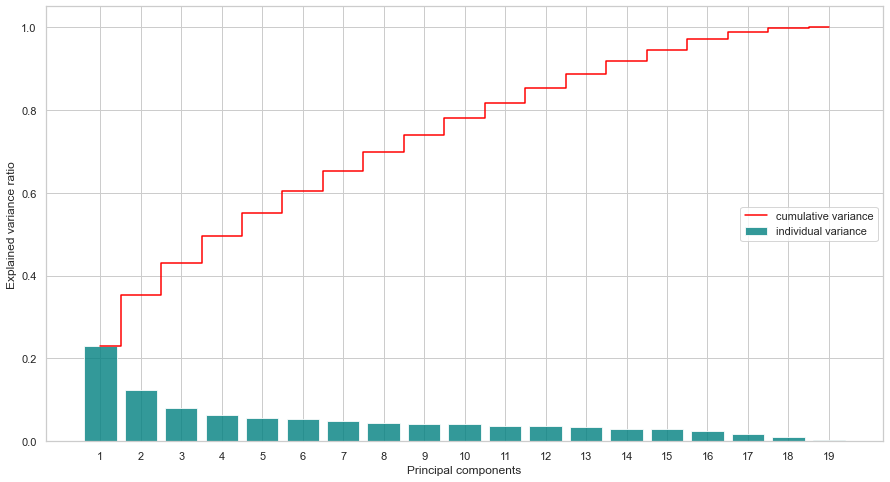

In [94]:
# Performing PCA
from sklearn.decomposition import PCA

pca = PCA(random_state = 1)
pca.fit(x_scaled)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["PC" + str(i) for i in range(1,20)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(15,8))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [95]:
pca_red = PCA(n_components=17)
X_reduced = pca_red.fit_transform(x_scaled)

As per PCA observation the first 17 components account for about 99% of the total explained variance. 
The dataset can reduced with 17 components and proceed further.

In [98]:
XC=X_reduced
yc=y_res_df

# Model Development

In [100]:
#import the necessary model algos.

#classifiaction
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [101]:
LC = LogisticRegression()
DTC = DecisionTreeClassifier()
KNNC= KNeighborsClassifier()
RFC = RandomForestClassifier()
SVc = SVC()
GRAC= GradientBoostingClassifier()
ADAC= AdaBoostClassifier()
GNBC= GaussianNB()
SGDC= SGDClassifier()
XGBC= XGBClassifier()

In [102]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(), SVC(),
       GradientBoostingClassifier(),AdaBoostClassifier(),GaussianNB(),SGDClassifier(),XGBClassifier()]

models=['LC=LogisticRegression','DTC=DecisionTreeClassifier','KNNC=KNeighborsClassifier','RFC=RandomForestClassifier',
        'SVc=SVC()','GRAC=GradientBoostingClassifier','ADAC=AdaBoostClassifier','GNBC=GaussianNB', 'SGDC=SGDClassifier()',
        'XGBC=XGBClassifier()']

acc_result=[]
train_result=[]

x_train,x_test,y_train,y_test=train_test_split(XC,yc,test_size=0.20,random_state=29)

for i in range(len(model)):
    clf=model[i]
    clf.fit(x_train,y_train)
    
    x_pred=clf.predict(x_train)
    y_pred=clf.predict(x_test)
    
    train_result.append(round (accuracy_score(y_train,x_pred)*100,2))
    acc_result.append(round (accuracy_score(y_pred,y_test)*100,2))

Result_df=pd.DataFrame({'Model Name':models, 'Training Score:':train_result ,'Accuracy Score (without tuning)':acc_result})
Result_df

,Model Name,Training Score:,Accuracy Score (without tuning)
0,LC=LogisticRegression,76.42,76.38
1,DTC=DecisionTreeClassifier,99.85,76.28
2,KNNC=KNeighborsClassifier,85.32,77.44
3,RFC=RandomForestClassifier,99.85,83.20
4,SVc=SVC(),85.06,82.53
5,GRAC=GradientBoostingClassifier,83.38,79.96
6,ADAC=AdaBoostClassifier,79.79,79.77
7,GNBC=GaussianNB,78.03,78.85
8,SGDC=SGDClassifier(),75.42,75.02
9,XGBC=XGBClassifier(),98.31,83.20


# 1. Logistic Regression:

In [103]:
acc_train=[]
acc_test=[]

for i in range (0,1000):
    x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.20, random_state=i)
    
    lc = LogisticRegression()
    lc.fit(x_train,y_train)
    
    x_lc_predict=lc.predict(x_train)
    y_lc_predict=lc.predict(x_test)
    
    acc_train.append(accuracy_score(y_train,x_lc_predict))
    acc_test.append(accuracy_score(y_test,y_lc_predict))
    

acc_train_index= acc_train.index(max(acc_train))    
print("Index of max vaule of train's accuracy_score at random_state:",acc_train_index)

acc_test_index= acc_test.index(max(acc_test))
print("Index of max vaule of test's accuracy_score at random_state:",acc_test_index)

Index of max vaule of train's accuracy_score at random_state: 306
Index of max vaule of test's accuracy_score at random_state: 400


Always choose best training score for random_state, because
1. if training score >= testing score ==> chance of best fit or undetfit
2. if training score << testing score ==> overfit
3. if training score >> testing score ==> underfit

In [104]:
kford_cv=KFold(n_splits=10,shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.21, random_state=306)
    
lc.fit(x_train,y_train)
x_lc_predict=lc.predict(x_train)
y_lc_predict=lc.predict(x_test)
lc_cv = cross_val_score(lc,XC,yc,cv=kford_cv, scoring='accuracy')
    
print ("The training accurancy @ 306 random_state is:",accuracy_score(y_train,x_lc_predict))
print ("The testing accurancy @ 306 ranom_state is:",accuracy_score(y_test,y_lc_predict))
print ("Cross Validation: ", lc_cv.mean())
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_lc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_lc_predict))

The training accurancy @ 306 random_state is: 0.7700698615026351
The testing accurancy @ 306 ranom_state is: 0.7418165053019825
Cross Validation:  0.7431320681089923

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.79      0.67      0.72      1093
         1.0       0.71      0.81      0.76      1076

    accuracy                           0.74      2169
   macro avg       0.75      0.74      0.74      2169
weighted avg       0.75      0.74      0.74      2169


 Conconfusion_matrix:
 [[733 360]
 [200 876]]


# 2. Decision Tree:

In [105]:
kford_val=KFold(n_splits=10)

grid_param = {
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_features':['auto','sqrt','log2'],
            'max_depth': [10,20,30,40,50],
            'min_samples_leaf': range (2,6), 
            'min_samples_split': range (3,8),
            'max_leaf_nodes': range (5,10)} 
    
grid_search = GridSearchCV (DTC, param_grid = grid_param, cv=kford_val, n_jobs = -1)
# n_jobs : Use all the cores in your system. For performance improvement.
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8),
                         'splitter': ['best', 'random']})

In [108]:
#Initiate DecisitionTreeClassifier with new parametes and train
dtc=grid_search.best_estimator_

# Train the model
dtc.fit(x_train,y_train)

x_dtc_predict=dtc.predict(x_train)
y_dtc_predict=dtc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_dtc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_dtc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_dtc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_dtc_predict))

The training accurancy is: 0.7399191077337909
The testing accurancy is: 0.7040110650069157

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      1093
         1.0       0.71      0.69      0.70      1076

    accuracy                           0.70      2169
   macro avg       0.70      0.70      0.70      2169
weighted avg       0.70      0.70      0.70      2169


 Conconfusion_matrix:
 [[788 305]
 [337 739]]


# 3. K-Nearest Neighbour:

In [109]:
neighbors = [i for i in range(1,10)]
parameter_grid = { 'algorithm' : ['auto','ball_tree','kd_tree', 'brute'],
                   'weights':['uniform', 'distance'],
                   'leaf_size' : [3,5,6,7,8,10],
                   'n_neighbors': neighbors}
gridsearch = GridSearchCV(KNNC, param_grid=parameter_grid, cv=kford_val)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8, 10],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [110]:
#Initiate KNN with new parametes and train
knnc=gridsearch.best_estimator_

# Train the model
knnc.fit(x_train,y_train)

x_knnc_predict=knnc.predict(x_train)
y_knnc_predict=knnc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_knnc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_knnc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_knnc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_knnc_predict))

The training accurancy is: 0.9987743596028925
The testing accurancy is: 0.8031350852927617

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.72      0.79      1093
         1.0       0.76      0.88      0.82      1076

    accuracy                           0.80      2169
   macro avg       0.81      0.80      0.80      2169
weighted avg       0.81      0.80      0.80      2169


 Conconfusion_matrix:
 [[790 303]
 [124 952]]


# 4. Random forest:

In [111]:
params = {  'n_estimators' : [10,50,100,200,],
            'criterion':['gini','entropy'],
            'max_depth': [10,15,45,80,], 
            'min_samples_leaf': [5,6],
            'min_samples_split': [10,11], 
            'max_leaf_nodes': range (5,10)}

gridsearch_rfc = GridSearchCV(RFC, param_grid=params,cv=kford_val, n_jobs = -1)
gridsearch_rfc.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 45, 80],
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [10, 50, 100, 200]})

In [112]:
#Initiate RandomForestClassifier with new parametes and train
rfc=gridsearch_rfc.best_estimator_

# Train the model
rfc.fit(x_train,y_train)

x_rfc_predict=rfc.predict(x_train)
y_rfc_predict=rfc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_rfc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_rfc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_rfc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_rfc_predict))

The training accurancy is: 0.7770560117661478
The testing accurancy is: 0.7413554633471646

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      1093
         1.0       0.73      0.76      0.75      1076

    accuracy                           0.74      2169
   macro avg       0.74      0.74      0.74      2169
weighted avg       0.74      0.74      0.74      2169


 Conconfusion_matrix:
 [[788 305]
 [256 820]]


# 5. SVC:

In [113]:
#Initiate RandomForestClassifier with new parametes and train
svc=SVC(gamma='auto')

# Train the model
svc.fit(x_train,y_train)

x_svc_predict=svc.predict(x_train)
y_svc_predict=svc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_svc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_svc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_svc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_svc_predict))

The training accurancy is: 0.863341095722515
The testing accurancy is: 0.8040571692023974

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1093
         1.0       0.80      0.80      0.80      1076

    accuracy                           0.80      2169
   macro avg       0.80      0.80      0.80      2169
weighted avg       0.80      0.80      0.80      2169


 Conconfusion_matrix:
 [[879 214]
 [211 865]]


# 6. Gradient Boosting Classifier:

In [114]:
#Initiate RandomForestClassifier with new parametes and train
grac=GradientBoostingClassifier(learning_rate= 0.01)

# Train the model
grac.fit(x_train,y_train)

x_grac_predict=grac.predict(x_train)
y_grac_predict=grac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_grac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_grac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_grac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_grac_predict))

The training accurancy is: 0.7758303713690403
The testing accurancy is: 0.7362840018441679

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.79      0.65      0.71      1093
         1.0       0.70      0.82      0.76      1076

    accuracy                           0.74      2169
   macro avg       0.74      0.74      0.73      2169
weighted avg       0.74      0.74      0.73      2169


 Conconfusion_matrix:
 [[710 383]
 [189 887]]


# 7. AdaBoost Classifier:

In [115]:
#Initiate RandomForestClassifier with new parametes and train
adac=AdaBoostClassifier(learning_rate= 0.01, base_estimator=RandomForestClassifier())

# Train the model
adac.fit(x_train,y_train)

x_adac_predict=adac.predict(x_train)
y_adac_predict=adac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_adac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_adac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_adac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_adac_predict))

The training accurancy is: 0.9985292315234711
The testing accurancy is: 0.8105117565698479

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1093
         1.0       0.80      0.83      0.81      1076

    accuracy                           0.81      2169
   macro avg       0.81      0.81      0.81      2169
weighted avg       0.81      0.81      0.81      2169


 Conconfusion_matrix:
 [[863 230]
 [181 895]]


# 8. GaussianNB:

In [116]:
#Initiate RandomForestClassifier with new parametes and train
gnbc=GaussianNB()

# Train the model
gnbc.fit(x_train,y_train)

x_gnbc_predict=gnbc.predict(x_train)
y_gnbc_predict=gnbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_gnbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_gnbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_gnbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_gnbc_predict))

The training accurancy is: 0.7873513911018507
The testing accurancy is: 0.7597971415398801

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.75      0.78      0.77      1093
         1.0       0.77      0.74      0.75      1076

    accuracy                           0.76      2169
   macro avg       0.76      0.76      0.76      2169
weighted avg       0.76      0.76      0.76      2169


 Conconfusion_matrix:
 [[851 242]
 [279 797]]


# 9. SGDClassifier:

In [117]:
#Initiate RandomForestClassifier with new parametes and train
sgdc=SGDClassifier(alpha=0.001)

# Train the model
sgdc.fit(x_train,y_train)

x_sgdc_predict=sgdc.predict(x_train)
y_sgdc_predict=sgdc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_sgdc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_sgdc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_sgdc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_sgdc_predict))

The training accurancy is: 0.7668831964701557
The testing accurancy is: 0.7349008759797142

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.79      0.65      0.71      1093
         1.0       0.70      0.82      0.75      1076

    accuracy                           0.73      2169
   macro avg       0.74      0.74      0.73      2169
weighted avg       0.74      0.73      0.73      2169


 Conconfusion_matrix:
 [[711 382]
 [193 883]]


# 10. XGBClassifier:

In [118]:
#Initiate RandomForestClassifier with new parametes and train
xgbc=XGBClassifier(n_estimators = 10, learning_rate = 1.5)

# Train the model
xgbc.fit(x_train,y_train)

x_xgbc_predict=xgbc.predict(x_train)
y_xgbc_predict=xgbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_xgbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_xgbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_xgbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_xgbc_predict))

The training accurancy is: 0.9094251746537566
The testing accurancy is: 0.76855693868142

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      1093
         1.0       0.75      0.79      0.77      1076

    accuracy                           0.77      2169
   macro avg       0.77      0.77      0.77      2169
weighted avg       0.77      0.77      0.77      2169


 Conconfusion_matrix:
 [[813 280]
 [222 854]]


In [119]:
Acc_Score_tun =[round (accuracy_score(y_test,y_lc_predict)*100,2),
                round (accuracy_score(y_test,y_dtc_predict)*100,2),
                round (accuracy_score(y_test,y_knnc_predict)*100,2),
                round (accuracy_score(y_test,y_rfc_predict)*100,2),
                round (accuracy_score(y_test,y_svc_predict)*100,2),
                round (accuracy_score(y_test,y_grac_predict)*100,2),
                round (accuracy_score(y_test,y_adac_predict)*100,2),
                round (accuracy_score(y_test,y_gnbc_predict)*100,2),
                round (accuracy_score(y_test,y_sgdc_predict)*100,2),
                round (accuracy_score(y_test,y_xgbc_predict)*100,2)]
Customer_Churn = pd.DataFrame({'Classifier':['lc= LogisticRegression()', 'dtc = DecisionTreeClassifier()',
                                 'knnc = KNeighborsClassifier()','rfc = RandomForestClassifier()','svc=SVC()',
                                 'grac = GradientBoostingClassifier()', 'adac=AdaBoostClassifier','gnbc=GaussianNB', 
                                  'sgdc=SGDClassifier()', 'xgbc=XGBClassifier()'], 
                                 
                                'Accuracy Score (with tuning)':Acc_Score_tun})
Customer_Churn

,Classifier,Accuracy Score (with tuning)
0,lc= LogisticRegression(),74.18
1,dtc = DecisionTreeClassifier(),70.40
2,knnc = KNeighborsClassifier(),80.31
3,rfc = RandomForestClassifier(),74.14
4,svc=SVC(),80.41
5,grac = GradientBoostingClassifier(),73.63
6,adac=AdaBoostClassifier,81.05
7,gnbc=GaussianNB,75.98
8,sgdc=SGDClassifier(),73.49
9,xgbc=XGBClassifier(),76.86


In [120]:
CUSTOMER_CHURN_ANALYSIS= pd.concat([Result_df,Customer_Churn],axis=1)
CUSTOMER_CHURN_ANALYSIS

,Model Name,Training Score:,Accuracy Score (without tuning),Classifier,Accuracy Score (with tuning)
0,LC=LogisticRegression,76.42,76.38,lc= LogisticRegression(),74.18
1,DTC=DecisionTreeClassifier,99.85,76.28,dtc = DecisionTreeClassifier(),70.40
2,KNNC=KNeighborsClassifier,85.32,77.44,knnc = KNeighborsClassifier(),80.31
3,RFC=RandomForestClassifier,99.85,83.20,rfc = RandomForestClassifier(),74.14
4,SVc=SVC(),85.06,82.53,svc=SVC(),80.41
5,GRAC=GradientBoostingClassifier,83.38,79.96,grac = GradientBoostingClassifier(),73.63
6,ADAC=AdaBoostClassifier,79.79,79.77,adac=AdaBoostClassifier,81.05
7,GNBC=GaussianNB,78.03,78.85,gnbc=GaussianNB,75.98
8,SGDC=SGDClassifier(),75.42,75.02,sgdc=SGDClassifier(),73.49
9,XGBC=XGBClassifier(),98.31,83.20,xgbc=XGBClassifier(),76.86


# We are gettig high model accuracy: 83.20% with RandomForestClassifier & XGBClassifier models without tuning, which shows model is performing exremely well, so we can save any model among these two model.

# Save the model using pickle

In [121]:
import pickle
pickle.dump(RFC,open('LOAN_APPLICATION_STATUS','wb'))